In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.impute import KNNImputer

In [5]:
df = pd.read_csv("ola_driver_scaler1.csv")

In [105]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User,Year
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0,2019
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0,2019
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,2019
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,2020
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3,0,2020
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3,0,2020
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2,0,2020
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2,0,2020


In [83]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


Define Problem Statement and perform Exploratory Data Analysis

Problem Definition:
Identify the key issue: High driver churn rate affecting Ola's operations and costs.

Converting the Buisness problem into ML problem

Goal  : Predict whether a driver will leave the company based on various attributes.


Target Column Creation : LastWorkingDate Column is Null the driver is still active if it has a date 
                         then the driver has churned out.

                         
ML : Create a Classification model to predict whether the driver will churn or not

Buisness Impacts : Accurately predicting which driver will churn can help in retaining the driver
                   by giving him more incentives thereby reducing the cost of acquiring new drivers.

In [ ]:
# Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 
# 'category' , missing value detection, statistical summary.

In [84]:
df.shape

(19104, 14)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [86]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [6]:
# Creating a target column

df["Churn_User"] = np.where(df["LastWorkingDate"].isnull(),0,1)

In [7]:
df["Churn_User"].value_counts()

Churn_User
0    17488
1     1616
Name: count, dtype: int64

In [ ]:
# Missing Columns

#  3   Age                   19043 non-null  float64
#  4   Gender                19052 non-null  float64

In [8]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
Churn_User                  0
dtype: int64

In [90]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,0.084590
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,0.278277
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,0.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,0.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,0.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,1.000000


In [17]:
df.head(30)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,0
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,0
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,0
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1,0
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1,1


In [22]:
len(df["Driver_ID"].unique())

2381

In [23]:
df["Driver_ID"].max()

2788

In [ ]:
# Univariate Analysis (distribution plots of all the continuous variable(s) 
# barplots/countplots of all the categorical variables)

<Axes: xlabel='Age', ylabel='Count'>

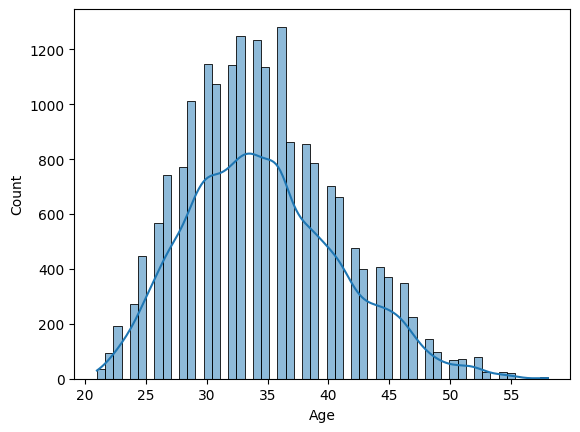

In [28]:
sns.histplot(data=df, x="Age", kde=True)

<Axes: xlabel='Income', ylabel='Count'>

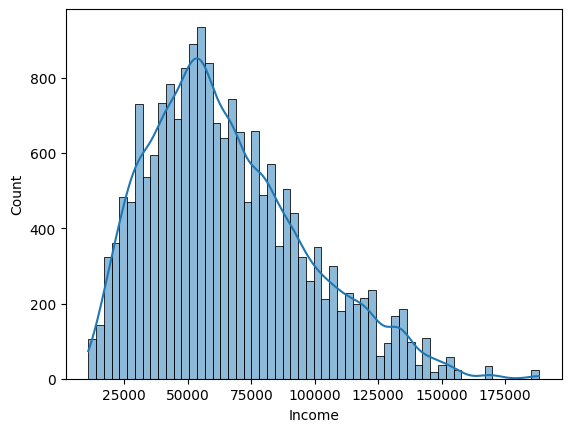

In [29]:
sns.histplot(data=df, x="Income", kde=True)

<Axes: xlabel='Quarterly Rating', ylabel='Count'>

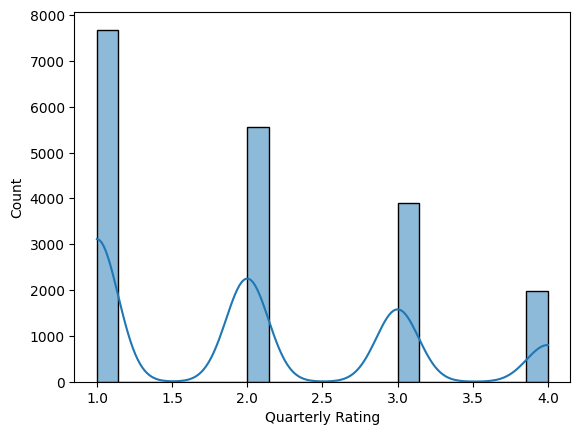

In [31]:
# Total Business Value

sns.histplot(data=df, x="Quarterly Rating", kde=True)

<Axes: xlabel='Income', ylabel='Count'>

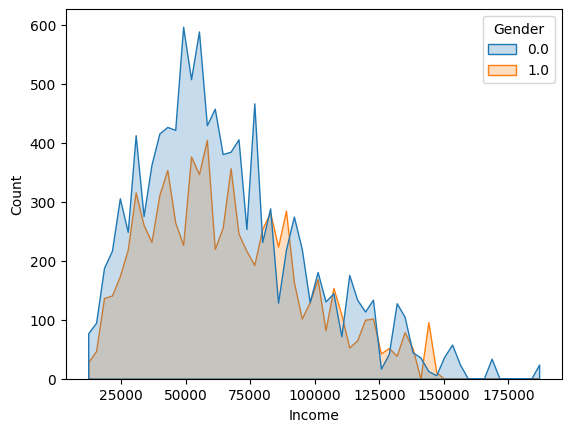

In [34]:
sns.histplot(df, x="Income", hue="Gender", element="poly")


<Axes: xlabel='Income', ylabel='Count'>

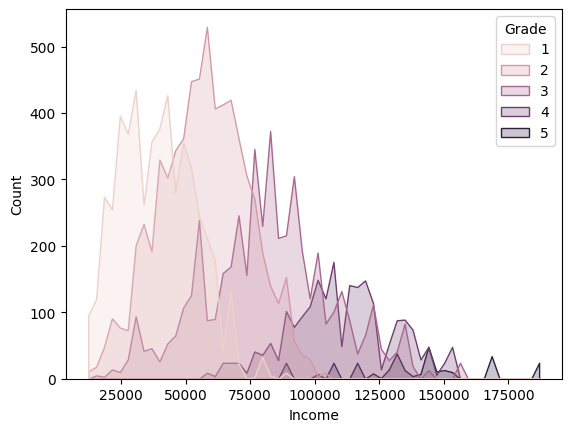

In [36]:
# City Grade

sns.histplot(df, x="Income", hue="Grade", element="poly")


<Axes: xlabel='count', ylabel='City'>

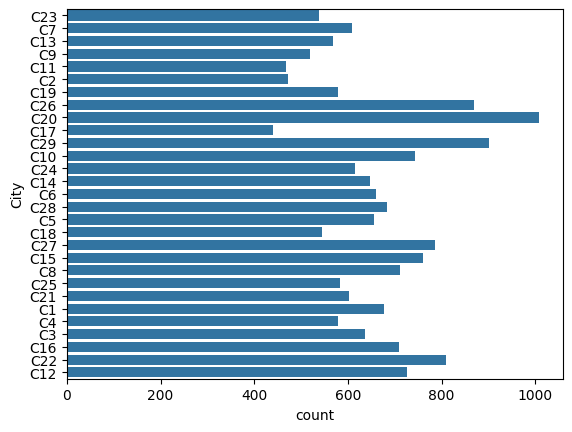

In [41]:
sns.countplot(data=df, y="City")


In [ ]:
# 1. What percentage of drivers have received a quarterly rating of 5?
# 2. Comment on the correlation between Age and Quarterly Rating.
# 3. Name the city which showed the most improvement in Quarterly Rating over
# the past year
# 4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
# (T/F)
# 5. If a driver's Quarterly Rating drops significantly, how does it impact their Total
# Business Value in the subsequent period?

In [25]:
# list(df["Quarterly Rating"].unique())
# list(df["Quarterly Rating"])

# list(df["Quarterly Rating"].value_counts())

[7679, 5553, 3895, 1977]

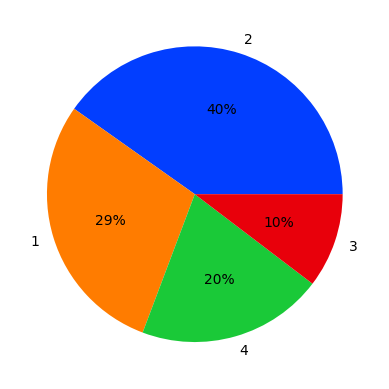

In [27]:
# importing libraries 
import matplotlib.pyplot as plt 
import seaborn 
  
# declaring data 
data = [44, 45, 40, 41, 39] 
keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5'] 
  
# define Seaborn color palette to use 
palette_color = seaborn.color_palette('bright') 
  
# plotting data on chart 
plt.pie(list(df["Quarterly Rating"].value_counts()), labels=df["Quarterly Rating"].unique(), colors=palette_color, autopct='%.0f%%') 
plt.grid()
# displaying chart 
plt.show()

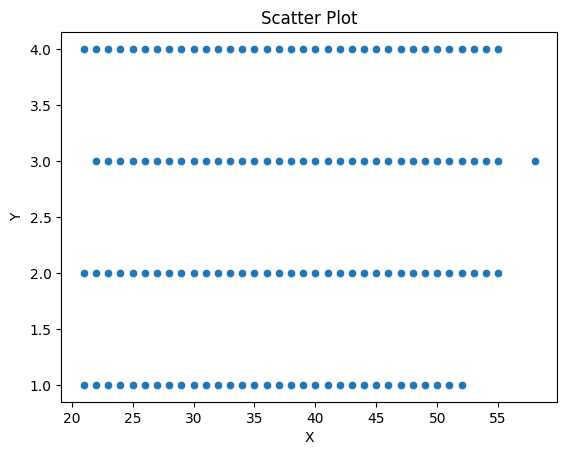

In [28]:
# Create scatter plot using Seaborn   Comment on the correlation between Age and Quarterly Rating.
sns.scatterplot(x=df["Age"], y=df["Quarterly Rating"], data=df)
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

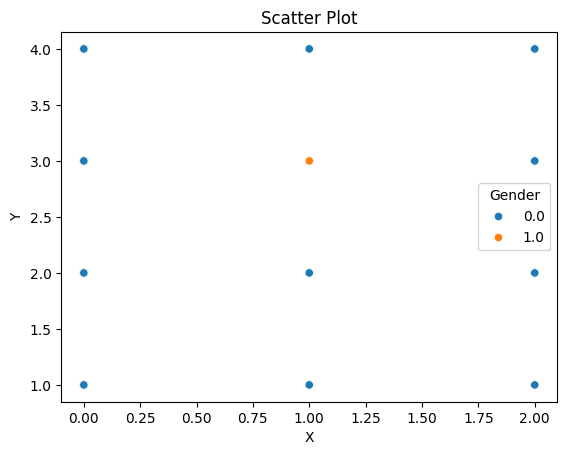

In [35]:
sns.scatterplot(data=df, x="Education_Level", y="Quarterly Rating", hue="Gender")
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

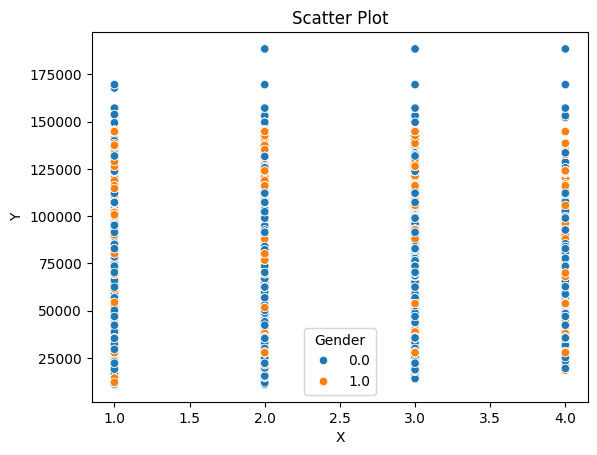

In [37]:
sns.scatterplot(data=df, y="Income", x="Quarterly Rating", hue="Gender")
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# 3. Name the city which showed the most improvement in Quarterly Rating over
# the past year


# 3. Name the city which showed the most improvement in Quarterly Rating over
# the past year
# 4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
# (T/F)
# 5. If a driver's Quarterly Rating drops significantly, how does it impact their Total
# Business Value in the subsequent period?

In [39]:
from datetime import datetime

# date_str = "01/01/19"
# date_obj = datetime.strptime(date_str, "%m/%d/%y")

In [41]:
df["Year"] = pd.to_datetime(df["MMM-YY"], format='%m/%d/%y').dt.year

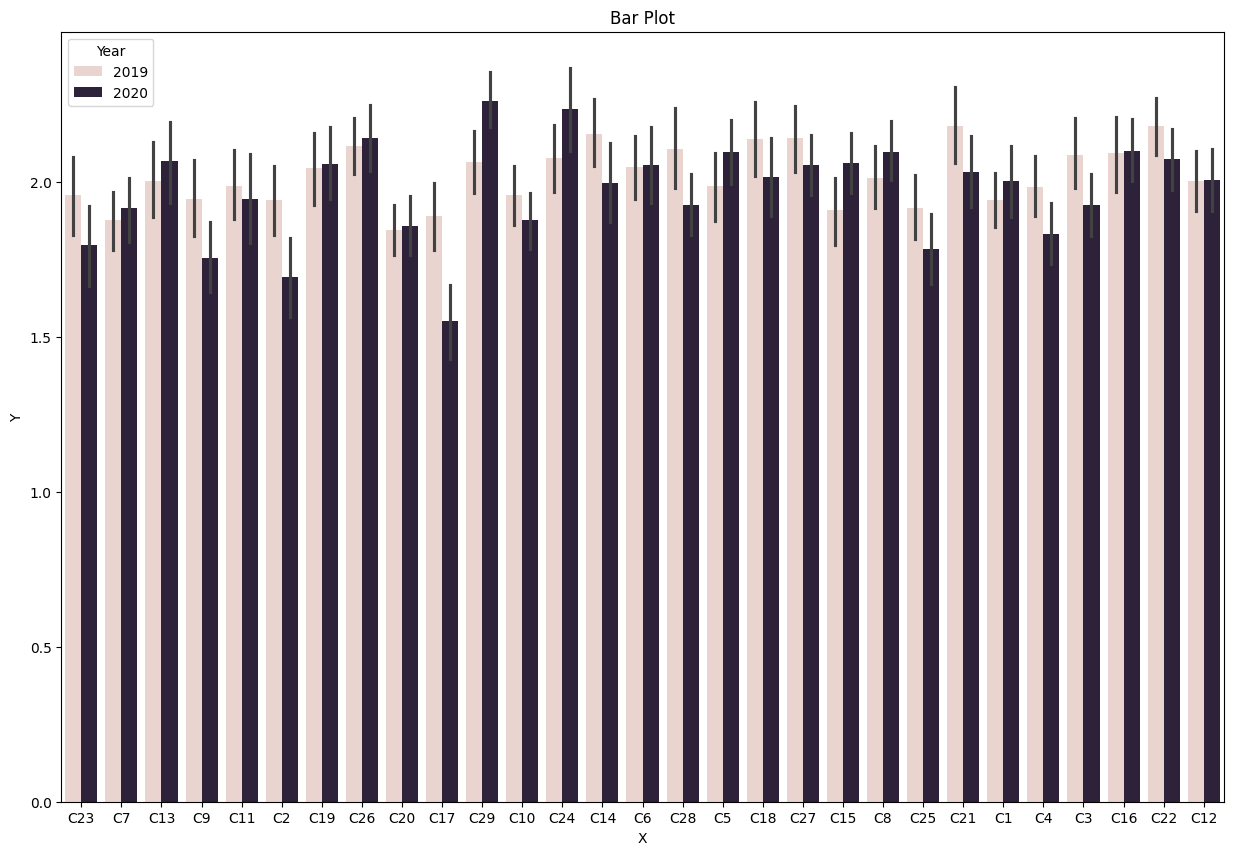

In [45]:
plt.figure(figsize=(15, 10)) 
sns.barplot(df, x="City", y="Quarterly Rating", hue="Year")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# C29 and C24 have shown increase in quarterly rating over these two years

In [53]:
df.groupby(["Year"])["Quarterly Rating"].mean()

Year
2019    2.019984
2020    1.997446
Name: Quarterly Rating, dtype: float64

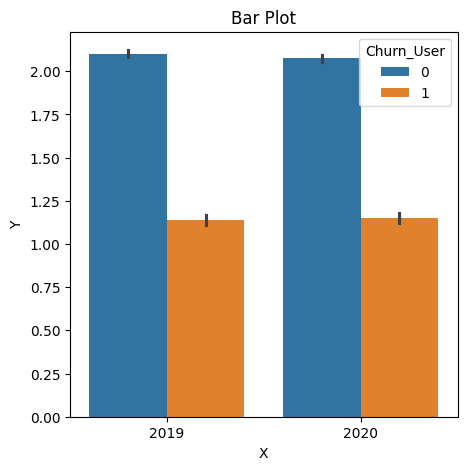

In [58]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Quarterly Rating", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

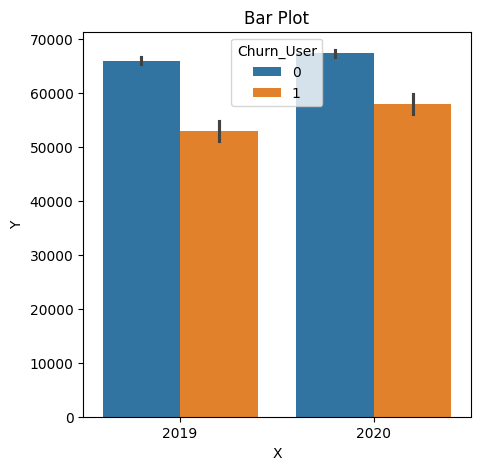

In [56]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Income", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [55]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Churn_User', 'Year'],
      dtype='object')

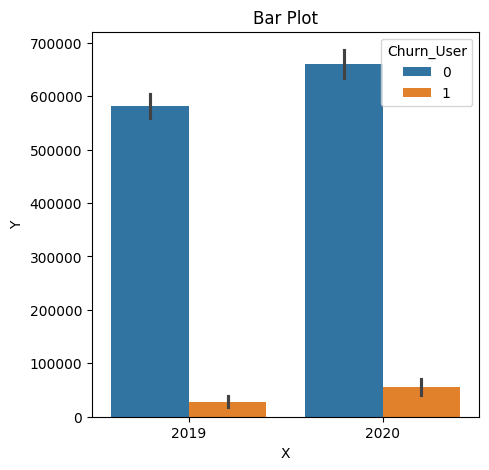

In [59]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Total Business Value", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

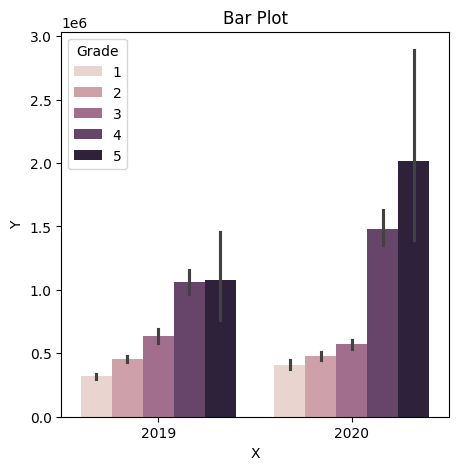

In [60]:
# plt.figure(figsize=(5, 5)) 
# sns.barplot(df, x="Year", y="Income")
# plt.title('Bar Plot')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# 4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
# (T/F)

plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Total Business Value", hue="Grade")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

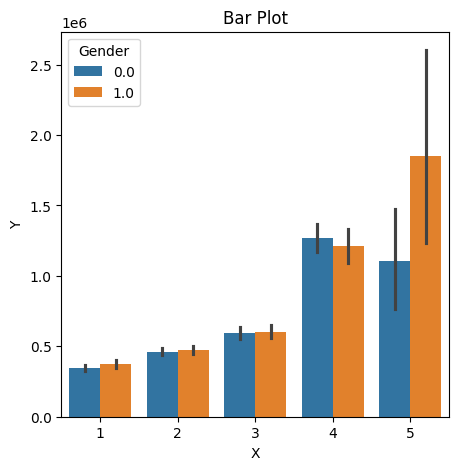

In [61]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Grade", y="Total Business Value", hue="Gender")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

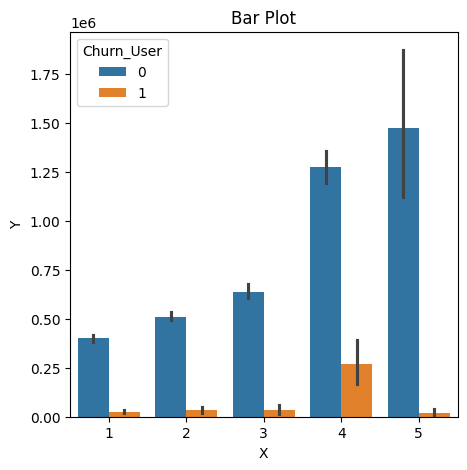

In [62]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Grade", y="Total Business Value", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# 5. If a driver's Quarterly Rating drops significantly, how does it impact their Total
# Business Value in the subsequent period?

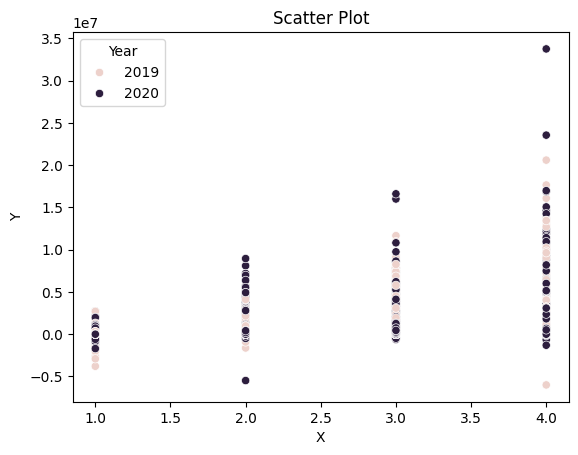

In [69]:
sns.scatterplot(data=df, y="Total Business Value", x="Quarterly Rating", hue="Year")
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

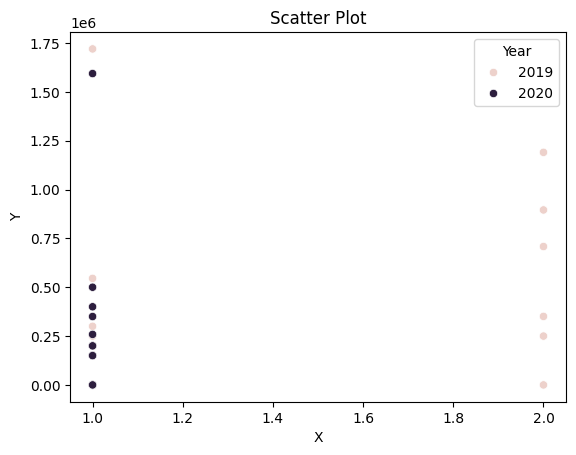

In [70]:
sns.scatterplot(data=df[df["Driver_ID"]==13], y="Total Business Value", x="Quarterly Rating", hue="Year")
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

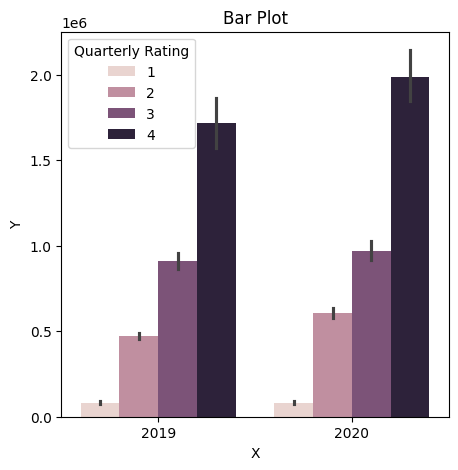

In [65]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, hue="Quarterly Rating", y="Total Business Value", x="Year")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [91]:
df.drop(columns=["LastWorkingDate"], inplace=True)

In [92]:
df.drop(columns=[ "Unnamed: 0"], inplace=True)

In [93]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,2381060,2,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,-665480,2,0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,0,2,1
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0


In [94]:
df["Gender"].fillna(df["Gender"].mode(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_18800\2567163690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode(), inplace=True)


In [95]:
df["Gender"].value_counts()

Gender
0.0    11074
1.0     7978
Name: count, dtype: int64

In [96]:
df2 = df[['Driver_ID', 'Gender', 'MMM-YY', 'Dateofjoining', 'City']]

In [97]:
df_impute = df[[ 'Age', 'Education_Level',
       'Income',  'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'Churn_User']]

KNN Imputation

In [ ]:
# Age and Gender needs to be filled with KNN imputation

In [ ]:
# replacing age with mode since its categorical

In [98]:
imputer = KNNImputer(n_neighbors=3)
df3 = imputer.fit_transform(df_impute)

# Perform the imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df3), columns=df_impute.columns)

In [99]:
df_imputed

,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User
0,28.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,0.0
1,28.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,0.0
2,28.0,2.0,57387.0,1.0,1.0,0.0,2.0,1.0
3,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,0.0
4,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
19099,30.0,2.0,70254.0,2.0,2.0,740280.0,3.0,0.0
19100,30.0,2.0,70254.0,2.0,2.0,448370.0,3.0,0.0
19101,30.0,2.0,70254.0,2.0,2.0,0.0,2.0,0.0
19102,30.0,2.0,70254.0,2.0,2.0,200420.0,2.0,0.0


In [100]:
df.head(30)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,2381060,2,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,-665480,2,0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,0,2,1
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,2,2,0,1,0
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,2,2,0,1,0
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,2,2,0,1,0
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,2,2,350000,1,0
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,2,2,0,1,1


In [101]:
df_final = pd.concat([df2, df_imputed], axis=1)

In [102]:
df_final

,Driver_ID,Gender,MMM-YY,Dateofjoining,City,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User
0,1,0.0,01/01/19,24/12/18,C23,28.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,0.0
1,1,0.0,02/01/19,24/12/18,C23,28.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,0.0
2,1,0.0,03/01/19,24/12/18,C23,28.0,2.0,57387.0,1.0,1.0,0.0,2.0,1.0
3,2,0.0,11/01/20,11/06/20,C7,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,0.0
4,2,0.0,12/01/20,11/06/20,C7,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,0.0,08/01/20,06/08/20,C27,30.0,2.0,70254.0,2.0,2.0,740280.0,3.0,0.0
19100,2788,0.0,09/01/20,06/08/20,C27,30.0,2.0,70254.0,2.0,2.0,448370.0,3.0,0.0
19101,2788,0.0,10/01/20,06/08/20,C27,30.0,2.0,70254.0,2.0,2.0,0.0,2.0,0.0
19102,2788,0.0,11/01/20,06/08/20,C27,30.0,2.0,70254.0,2.0,2.0,200420.0,2.0,0.0


In [106]:
df_final["Current_date"] = df_final["MMM-YY"]

# Aggregate data in order to remove multiple occurrences of same driver data

In [107]:
# Sort the DataFrame by Driver and Quarter
df1 = df.sort_values(by=['Driver_ID', 'MMM-YY'])

# Calculate the difference in rating between consecutive quarters
df1['Rating_Difference'] = df1.groupby('Driver_ID')['Total Business Value'].diff()

# Calculate the rating difference percentage
df1['Rating_Diff_Percentage'] = (df1['Rating_Difference'] / df1['Total Business Value'].shift(1)) * 100

# Print the DataFrame with the new column
df1['Rating_Diff_Percentage'] = df1['Rating_Diff_Percentage'].fillna(0)

df1['Rating_Diff_Percentage'] = df1['Rating_Diff_Percentage'].replace([np.inf, -np.inf, np.nan, 'inf'], 0)

df1

In [ ]:
# Feature Engineering Steps:

# Create a column which tells whether the quarterly rating has increased for that driver - 
# for those whose quarterly rating has increased we assign the value 1

# Target variable creation: Create a column called target which tells whether the driver has left the
# company- driver whose last working day is present will have the value 1

# Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [73]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User,Year
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0,2019
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0,2019
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,2019
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,2020
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3,0,2020
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3,0,2020
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2,0,2020
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2,0,2020


In [81]:

# Sort the DataFrame by Driver and Quarter
df1 = df.sort_values(by=['Driver_ID', 'MMM-YY'])

# Calculate the difference in rating between consecutive quarters
df1['Rating_Difference'] = df1.groupby('Driver_ID')['Quarterly Rating'].diff()

# Create a column to indicate if rating has increased (1) or not (0)
df1['Rating_Increased'] = (df1['Rating_Difference'] > 0).astype(int)

In [78]:
df1[df1["Churn_User"]==1]["Increased"].value_counts()

Increased
0    1598
1      18
Name: count, dtype: int64

In [79]:
df1[df1["Churn_User"]==0]["Increased"].value_counts()

Increased
0    14713
1     2775
Name: count, dtype: int64

In [84]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Churn_User', 'Year'],
      dtype='object')

In [87]:
# Sort the DataFrame by Driver and Quarter
df2 = df1.sort_values(by=['Driver_ID', 'MMM-YY'])

# Calculate the difference in rating between consecutive quarters
df2['Income_Difference'] = df2.groupby('Driver_ID')['Income'].diff()

# Create a column to indicate if rating has increased (1) or not (0)
df2['Income_Increased'] = (df2['Income_Difference'] > 0).astype(int)


In [90]:
df2[df2["Income_Increased"]==0]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User,Year,Rating_Difference,Rating_Increased,Income_Difference,Income_Increased
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0,2019,NaN,0,NaN,0
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0,2019,0.0,0,0.0,0
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,2019,0.0,0,0.0,0
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,2020,NaN,0,NaN,0
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,2020,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3,0,2020,0.0,0,0.0,0
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3,0,2020,0.0,0,0.0,0
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2,0,2020,-1.0,0,0.0,0
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2,0,2020,0.0,0,0.0,0


In [91]:
df2["Current_date"] = df2["MMM-YY"]

In [95]:
def last_value(series):
    return series.iloc[-1]

# result = grouped.agg(last_value)

In [96]:
column_aliases = {
    'Current_date': 'Current_date',
    'MMM-YY': 'Total_Months_Worked',
    'Grade':'Max_Grade',
    'Income': 'Income_Total',
    'Age': 'Age_Max',
    'Total Business Value': 'Total_Business_Value',
    'Quarterly Rating': 'Quarterly_Rating_Mean',
    'Churn_User' : 'Churn_User'
}


df_agg = df2.groupby(['Driver_ID', 'Gender', 'City', 'Education_Level', 'Joining Designation'])\
            .agg({'Current_date':'max', 'MMM-YY':'count',  'Grade':'max','Income': 'sum', 'Age':'max', 'Total Business Value': 'sum', 'Quarterly Rating': 'mean',
                  'Rating_Increased': last_value, 'Income_Increased':last_value, 'Churn_User':'max'})\
            .rename(columns=column_aliases)

df_agg.reset_index(inplace=True)

In [98]:
df_agg[df_agg["Churn_User"]==1]

,Driver_ID,Gender,City,Education_Level,Joining Designation,Current_date,Total_Months_Worked,Max_Grade,Income_Total,Age_Max,Total_Business_Value,Quarterly_Rating_Mean,Rating_Increased,Income_Increased,Churn_User
0,1,0.0,C23,2,1,03/01/19,3,1,172161,28.0,1715580,2.000000,0,0,1
2,4,0.0,C13,2,2,12/01/19,5,2,328015,43.0,350000,1.000000,0,0,1
3,5,0.0,C9,0,1,03/01/19,3,1,139104,29.0,120360,1.000000,0,0,1
5,8,0.0,C2,0,3,11/01/20,3,3,211968,34.0,0,1.000000,0,0,1
7,12,0.0,C23,2,1,12/01/19,6,1,168696,35.0,2607180,2.500000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2779,0.0,C26,0,3,02/01/20,2,3,190266,28.0,0,1.000000,0,0,1
2375,2782,0.0,C19,1,1,08/01/19,4,1,118328,26.0,0,1.000000,0,0,1
2377,2785,1.0,C9,0,1,10/01/20,3,1,36315,34.0,0,1.000000,0,0,1
2378,2786,0.0,C19,0,2,09/01/19,9,2,318330,45.0,2815090,1.666667,0,0,1


In [104]:
df_agg[df_agg["Income_Increased"]==1].count()

Driver_ID                41
Gender                   41
City                     41
Education_Level          41
Joining Designation      41
Current_date             41
Total_Months_Worked      41
Max_Grade                41
Income_Total             41
Age_Max                  41
Total_Business_Value     41
Quarterly_Rating_Mean    41
Rating_Increased         41
Income_Increased         41
Churn_User               41
dtype: int64

In [102]:
df_agg.count()

Driver_ID                2381
Gender                   2381
City                     2381
Education_Level          2381
Joining Designation      2381
Current_date             2381
Total_Months_Worked      2381
Max_Grade                2381
Income_Total             2381
Age_Max                  2381
Total_Business_Value     2381
Quarterly_Rating_Mean    2381
Rating_Increased         2381
Income_Increased         2381
Churn_User               2381
dtype: int64

In [ ]:
# Income_Increased and Rating Increased dont add any value since there are only 41 dows with 1 so dropping the columns

In [94]:
df_agg

,Driver_ID,Gender,City,Education_Level,Joining Designation,Current_date,Total_Months_Worked,Max_Grade,Income_Total,Age_Max,Total_Business_Value,Quarterly_Rating_Mean,Churn_User
0,1,0.0,C23,2,1,03/01/19,3,1,172161,28.0,1715580,2.000000,1
1,2,0.0,C7,2,2,12/01/20,2,2,134032,31.0,0,1.000000,0
2,4,0.0,C13,2,2,12/01/19,5,2,328015,43.0,350000,1.000000,1
3,5,0.0,C9,0,1,03/01/19,3,1,139104,29.0,120360,1.000000,1
4,6,1.0,C11,1,3,12/01/20,5,3,393640,31.0,1265000,1.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0.0,C24,0,2,12/01/20,24,3,1987560,34.0,21748820,2.625000,0
2377,2785,1.0,C9,0,1,10/01/20,3,1,36315,34.0,0,1.000000,1
2378,2786,0.0,C19,0,2,09/01/19,9,2,318330,45.0,2815090,1.666667,1
2379,2787,1.0,C20,2,1,06/01/19,6,1,416988,28.0,977830,1.500000,1


In [112]:
df_agg.to_csv("df_grouped.csv")

In [107]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Churn_User', 'Year'],
      dtype='object')

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_User,Year,Rating_Difference,Rating_Diff_Percentage
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0,2019,NaN,0.000000
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0,2019,-3046540.0,-127.948897
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,2019,665480.0,-100.000000
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,2020,NaN,0.000000
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,2020,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3,0,2020,242590.0,48.743194
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3,0,2020,-291910.0,-39.432377
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2,0,2020,-448370.0,-100.000000
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2,0,2020,200420.0,0.000000


In [116]:
np.mean(df1["Rating_Diff_Percentage"])

31.83531882062189

In [ ]:
""